<a href="https://colab.research.google.com/github/luistorres109/disciplina_ia_ds/blob/main/ds_trabalho_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/online_retail_II.csv")
print(df)

Mounted at /content/drive
        Invoice StockCode                          Description  Quantity  \
0        489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1        489434    79323P                   PINK CHERRY LIGHTS        12   
2        489434    79323W                  WHITE CHERRY LIGHTS        12   
3        489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4        489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
...         ...       ...                                  ...       ...   
1067366  581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
1067367  581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
1067368  581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
1067369  581587     22138        BAKING SET 9 PIECE RETROSPOT          3   
1067370  581587      POST                              POSTAGE         1   

                 InvoiceDate  Price  Customer ID         Coun

A media de quantidades é 11
Os dez produtos mais vendidos são:
 - World War 2 Gliders Asstd Designs
 - White Hanging Heart T-Light Holder
 - Assorted Colour Bird Ornament
 - Paper Craft , Little Birdie
 - Jumbo Bag Red Retrospot
 - Medium Ceramic Top Storage Jar
 - Brocade Ring Purse 
 - Pack Of 60 Pink Paisley Cake Cases
 - 60 Teatime Fairy Cake Cases
 - Small Popcorn Holder
A mediana das vendas é: 3.0
O desvio padrão do valor total de vendas é: 217


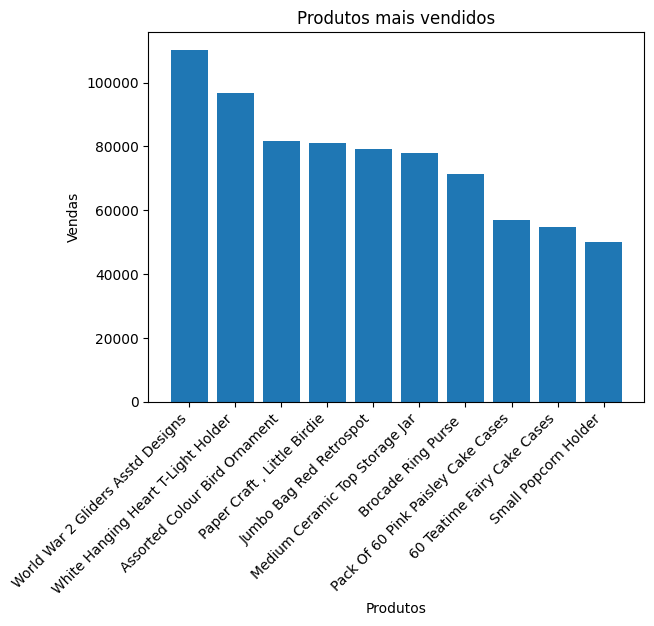

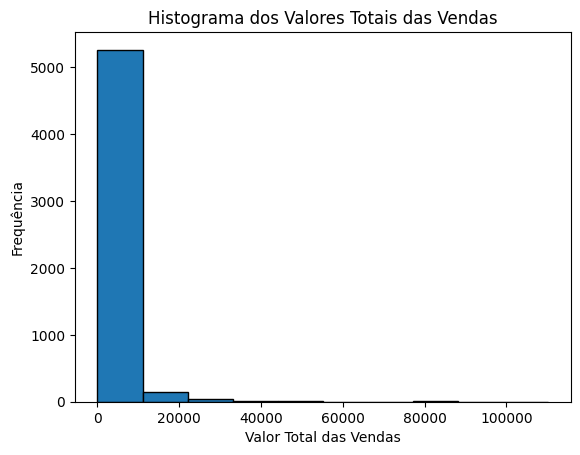

Eis as medias de cada iteração:
- A media da Amostra 1 eh 2.6240000000000006
- A media da Amostra 2 eh 3.4029999999999996
- A media da Amostra 3 eh 4.0108
- A media da Amostra 4 eh 4.025
- A media da Amostra 5 eh 3.7062399999999998
- A media da Amostra 6 eh 3.6557333333333335
- A media da Amostra 7 eh 3.6857714285714285
- A media da Amostra 8 eh 3.6195


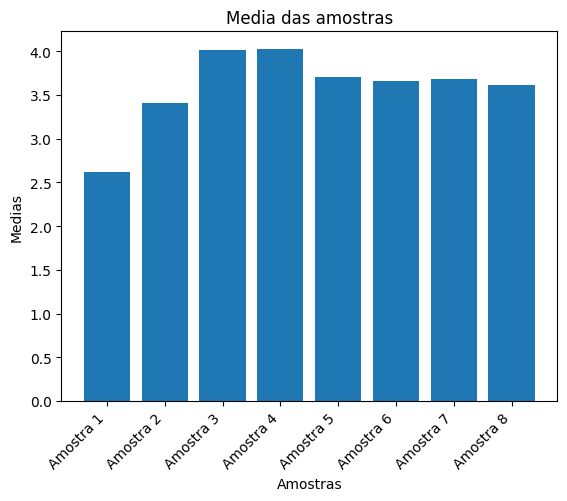

In [24]:
import matplotlib.pyplot as plt

# Tratar dados
df = df.loc[df['Quantity'] >= 0]

# Listas para
produtos = []
quantidades = []

# Média do valor total de vendas
media_quantidades = df['Quantity'].fillna(0).sum()/df['Quantity'].count()
print("A media de quantidades é "+str(int(media_quantidades)))

# Prudutos mais vendidos
grupo_produto = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
produtos_mais_vendidos = grupo_produto.head(10)

print("Os dez produtos mais vendidos são:")

# Exibir os dez produtos mais vendidos e adiciona-los em uma lista para criação do gráfico
for indice, produto in enumerate(produtos_mais_vendidos):
  produto_vendido = str(produtos_mais_vendidos.index[indice]).lower().title()
  produtos.append(produto_vendido)
  quantidades.append(produto)
  print(" - "+produto_vendido)

# Mediana de Vendas
mediana = df['Quantity'].median()

print(f'A mediana das vendas é: {mediana}')

# Desvio padrão
df['Valor Total'] = df['Quantity'] * df['Price']

desvio_padrao = int(df['Valor Total'].std())

print(f'O desvio padrão do valor total de vendas é: {desvio_padrao}')

# Criando o gráfico
plt.bar(range(len(produtos)), quantidades, tick_label=produtos)
plt.xticks(rotation=45, ha='right')  # Rotação de 45 graus e alinhamento à direita
plt.title('Produtos mais vendidos')
plt.xlabel('Produtos')
plt.ylabel('Vendas')
plt.show()

# Histograma dos valores totais de vendas
plt.hist(grupo_produto, bins=10, edgecolor='black')
plt.xlabel('Valor Total das Vendas')
plt.ylabel('Frequência')
plt.title('Histograma dos Valores Totais das Vendas')
plt.show()

# Amostras
amostras = []
amostras_nome = []
amostras_medias = []
df_price = df['Price']
tamanhos_amostra = [25, 50, 75, 100, 125, 150, 175, 200]
for indice, tamanho in enumerate(tamanhos_amostra):
  amostra = df_price.sample(n=tamanho, random_state=42)
  amostras.append(amostra)
  amostras_nome.append(f"Amostra {indice+1}")
for amostra in amostras:
  valor_total = amostra.sum()
  quantia = len(amostra)
  media = valor_total/quantia
  amostras_medias.append(media)
print("Eis as medias de cada iteração:")
for i in range(8):
  print(f"- A media da {amostras_nome[i]} eh {amostras_medias[i]}")

# Gráfico das amostras
plt.bar(range(len(amostras_nome)), amostras_medias, tick_label=amostras_nome)
plt.xticks(rotation=45, ha='right')  # Rotação de 45 graus e alinhamento à direita
plt.title('Media das amostras')
plt.xlabel('Amostras')
plt.ylabel('Medias')
plt.show()